# Getting started
First we import Keras and as a test we check to see what backend it's using

In [1]:
# matplotlib is used for...you guessed it: plotting!
import matplotlib.pyplot as plt

# This next line is a Jupyter directive. It tells Jupyter that we want our plots to show
# up right below the code that creates them.
%matplotlib inline

In [2]:
import tensorflow as tf
from keras import backend,__version__ as keras_version

print "Current backend:\t" + backend._BACKEND
print "TensorFlow version:\t" + tf.__version__
print "Using Keras Version:\t" + keras_version

Current backend:	tensorflow
TensorFlow version:	1.0.1
Using Keras Version:	2.0.2


Using TensorFlow backend.


## Setup our imports 
Here we're using the `keras.datasets` module to download the `mnist` dataset from amazon

In [3]:
'''Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).
2 seconds per epoch on a K520 GPU.
'''

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.callbacks import TensorBoard
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

batch_size = 128
nb_classes = 10
nb_epoch = 10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [4]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nb_epoch,
                    callbacks=[TensorBoard(log_dir='/tensorboard', histogram_freq=1,write_images=True, write_graph=True)],
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1

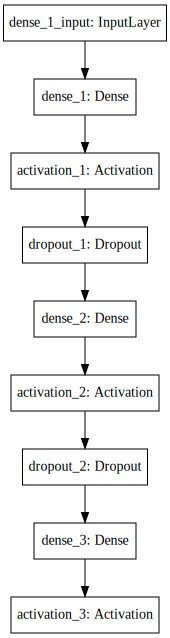

In [5]:
from IPython.display import SVG 
from keras.utils.vis_utils import model_to_dot 
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [6]:
model.save('mnist-example-model.h5')